## Initialisations

In [1]:
# initialisations
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind, ttest_rel
import random
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [2]:
sns.set(
    palette="Paired",
    #style='whitegrid',
    color_codes=True,
    rc={"figure.figsize": (12,8)},
)

In [3]:
url='https://drive.google.com/file/d/1kT70XbuamwT68SnK60My4ff08Y03Ce-t/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
adult_df = pd.read_csv(url)
adult_df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
import os
import warnings
from plotly.subplots import make_subplots
import pickle
import plotly.graph_objects as go
import plotly.express as px
from sklearn import svm
from sklearn import tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder,OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from math import sqrt
pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')

## Preprocessing

In [5]:
adult_df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [6]:
adult_df = adult_df.drop(columns="educational-num")

In [7]:
adult_df = adult_df.rename(columns={"marital-status": "marital_status", "capital-gain": "capital_gain", "capital-loss": "capital_loss", "hours-per-week": "hours_per_week", "native-country": "native_country"})

In [8]:
for col in adult_df:
    print(col)
    print(adult_df[col].nunique())
    print(adult_df[col].unique())

age
74
[25 38 28 44 18 34 29 63 24 55 65 36 26 58 48 43 20 37 40 72 45 22 23 54
 32 46 56 17 39 52 21 42 33 30 47 41 19 69 50 31 59 49 51 27 57 61 64 79
 73 53 77 80 62 35 68 66 75 60 67 71 70 90 81 74 78 82 83 85 76 84 89 88
 87 86]
workclass
9
['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
fnlwgt
28523
[226802  89814 336951 ... 129912 255835 257302]
education
16
['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']
marital_status
7
['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
occupation
15
['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces']
re

In [9]:
adult_df.shape[0]

48842

In [10]:
for col in adult_df:
    adult_df = adult_df[adult_df[col] != '?']

In [11]:
for col in adult_df:
    adult_df = adult_df[adult_df[col] != 'Other']

In [12]:
for col in adult_df:
    adult_df = adult_df[adult_df[col] != 'Other-relative']

In [13]:
for col in adult_df:
    adult_df = adult_df[adult_df[col] != 'Other-service']

In [14]:
adult_df.shape[0]

39056

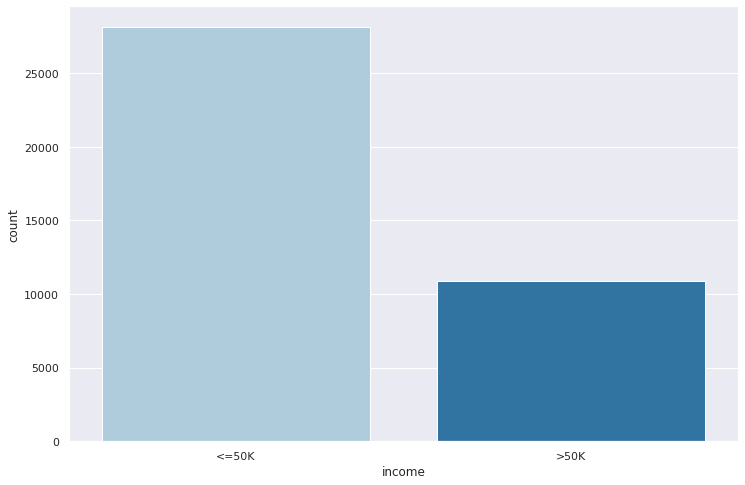

In [15]:
sns.countplot(data=adult_df,x='income')

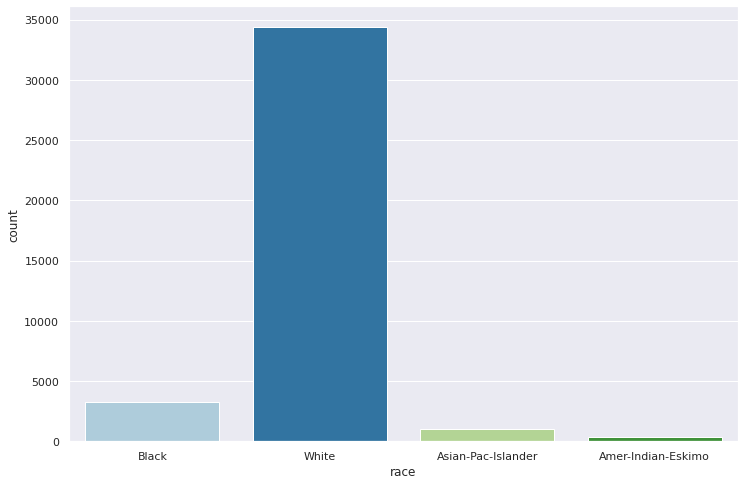

In [16]:
sns.countplot(data=adult_df,x='race')

In [17]:
adult_df.income.value_counts()

<=50K    28136
>50K     10920
Name: income, dtype: int64

Label Encoder

What is a label encoder? Image result for label encoder Label Encoding is a popular encoding technique for handling categorical variables. In this technique, each label is assigned a unique integer based on alphabetical ordering

In [18]:
le = LabelEncoder()
adult_df.workclass = le.fit_transform(adult_df.workclass)
adult_df.education = le.fit_transform(adult_df.education)
adult_df.marital_status = le.fit_transform(adult_df.marital_status)
adult_df.occupation = le.fit_transform(adult_df.occupation)
adult_df.relationship = le.fit_transform(adult_df.relationship)
adult_df.race = le.fit_transform(adult_df.race)
adult_df.gender = le.fit_transform(adult_df.gender)
adult_df.native_country = le.fit_transform(adult_df.native_country)
adult_df.income = le.fit_transform(adult_df.income)

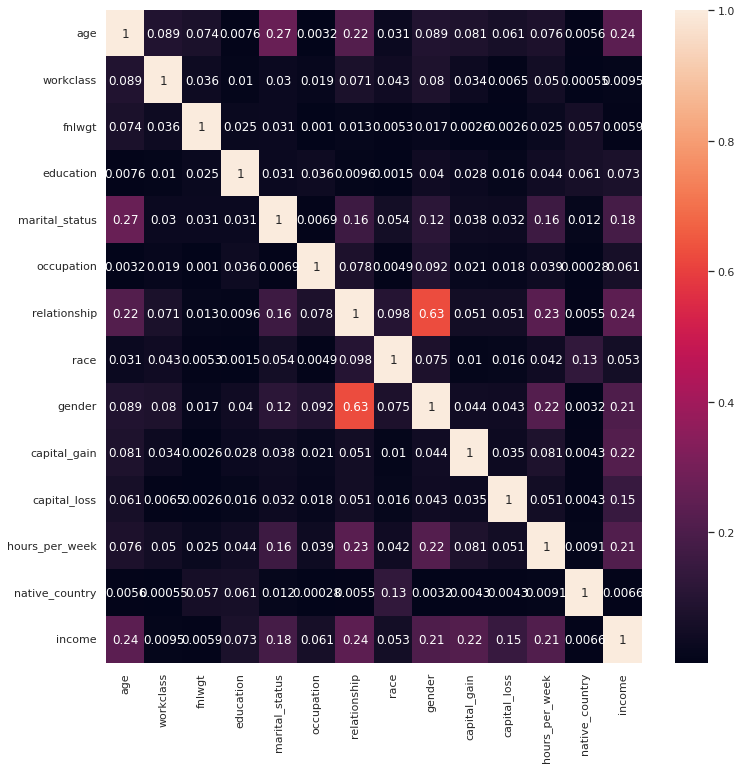

In [19]:
plt.figure(figsize=(12,12))
map = sns.heatmap(adult_df.corr().abs(),annot=True)

In [20]:
adult_df.head()

,age,workclass,fnlwgt,education,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,2,226802,1,4,6,2,2,1,0,0,40,37,0
1,38,2,89814,11,2,4,0,3,1,0,0,50,37,0
2,28,1,336951,7,2,9,0,3,1,0,0,40,37,1
3,44,2,160323,15,2,6,0,2,1,7688,0,40,37,1
7,63,4,104626,14,2,8,0,3,1,3103,0,32,37,1


## Test-Train Split

In [21]:
X = adult_df.drop('income',axis=1)
y = adult_df[['income']]

K-Fold

In [22]:
KF = StratifiedKFold(n_splits=3,shuffle=True,random_state=64)
for train_index, test_index in KF.split(X, y):
    x_train, x_test = X.iloc[list(train_index)], X.iloc[list(test_index)]
    y_train, y_test = y.iloc[list(train_index)], y.iloc[list(test_index)]

In [23]:
print("Train data shape:{}".format(x_train.shape))
print("Test data shape:{}".format(x_test.shape))

Train data shape:(26038, 13)
Test data shape:(13018, 13)


Scaling data

In [24]:
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(x_train)
scaled_test = scaler.transform(x_test)

## kNN

In [25]:
knn_model = KNeighborsClassifier(n_neighbors=3)

In [26]:
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [27]:
pred = knn_model.predict(x_test)

In [28]:
knnaccuracy = accuracy_score(y_test, pred)

In [29]:
parameters = {"n_neighbors": range(1, 200, 4)}
gridsearch = GridSearchCV(KNeighborsClassifier(), parameters)
gridsearch.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 200, 4)})

In [30]:
gridsearch.best_params_

{'n_neighbors': 21}

In [63]:
knn_model_tuned = KNeighborsClassifier(n_neighbors=21)

In [64]:
knn_model_tuned.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=21)

In [65]:
pred = knn_model_tuned.predict(x_test)

In [66]:
knntaccuracy = accuracy_score(y_test, pred)

## Support Vector Machine

SVM is another algorithm for classifying data. It tries to divide the data up using lines, sometimes straight linear lines and sometimes curved lines.

SVM tries to find the best lines - actually, a plane in multiple dimensions - to divide the data up into the known categories.

### Linear SVM

In [35]:
#Create a svm Classifier
svmclf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
svmclf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = svmclf.predict(x_test)

In [36]:
# Model Accuracy
svmlaccuracy = metrics.accuracy_score(y_test, y_pred)
svmlaucscore = roc_auc_score(y_test, pred)
print("Overall AUC on validation: {:.3f}" .format(svmlaucscore))

Overall AUC on validation: 0.573


### Non linear SVM

In [37]:
#Create a svm Classifier
svmclf = svm.SVC(kernel='rbf') # Non-Linear Kernel

#Train the model using the training sets
svmclf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = svmclf.predict(x_test)

In [38]:
# Model Accuracy
svmnlaccuracy = metrics.accuracy_score(y_test, y_pred)
svmnlaucscore = roc_auc_score(y_test, pred)
print("Overall AUC on validation: {:.3f}" .format(svmnlaucscore))

Overall AUC on validation: 0.573


## Decision Tree Model

The Decision-Tree algorithm is one of the most frequently and widely used supervised machine learning algorithms that can be used for both classification and regression tasks.

The intuition behind the Decision-Tree algorithm is very simple to understand.

The Decision Tree algorithm intuition is as follows:-
For each attribute in the dataset, the Decision-Tree algorithm forms a node. The most important attribute is placed at the root node.

For evaluating the task in hand, we start at the root node and we work our way down the tree by following the corresponding node that meets our condition or decision.

This process continues until a leaf node is reached. It contains the prediction or the outcome of the Decision Tree.

In [39]:
dt = DecisionTreeClassifier()

In [40]:
dt.fit(scaled_train,y_train)

DecisionTreeClassifier()

In [41]:
pred = dt.predict(scaled_test)

In [42]:
dtaccuracy = accuracy_score(y_test,pred)

In [43]:
param_grid = {'criterion': ['gini', 'entropy'],  #scoring methodology; two supported formulas for calculating information gain - default is gini
              'splitter': ['best', 'random'], #splitting methodology; two supported strategies - default is best
              'max_depth': [2,4,6,8,10,None], #max depth tree can grow; default is none
              'min_samples_split': [2,5,10,.03,.05], #minimum subset size BEFORE new split (fraction is % of total); default is 2
              'min_samples_leaf': [1,5,10,.03,.05], #minimum subset size AFTER new split split (fraction is % of total); default is 1
              'max_features': [None, 'auto'], #max features to consider when performing split; default none or all
              'random_state': [0] #seed or control random number generator
             }

In [44]:
tune_model = GridSearchCV(DecisionTreeClassifier(), 
                          param_grid=param_grid, 
                          scoring = 'roc_auc',
                          cv = 5,
                          verbose=0)
tune_model.fit(scaled_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, None],
                         'max_features': [None, 'auto'],
                         'min_samples_leaf': [1, 5, 10, 0.03, 0.05],
                         'min_samples_split': [2, 5, 10, 0.03, 0.05],
                         'random_state': [0], 'splitter': ['best', 'random']},
             scoring='roc_auc')

In [45]:
print('\033[1m'+'Decision Tree Parameters:{} '.format(tune_model.best_params_))

Decision Tree Parameters:{'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 0.03, 'random_state': 0, 'splitter': 'best'} 


In [60]:
dt_tuned =  DecisionTreeClassifier(criterion='entropy',
                                   min_samples_split=0.03,
                                   max_depth=None,
                                   max_features = None,
                                   min_samples_leaf=1,
                                   random_state = 0,
                                   splitter='best')

dt_tuned.fit(scaled_train,y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_split=0.03,
                       random_state=0)

In [61]:
pred = dt_tuned.predict(scaled_test)

In [62]:
dttaccuracy = accuracy_score(y_test,pred)

## Test-Train Split

In [49]:
X = adult_df.drop('income',axis=1)
y = adult_df[['income']]

K-Fold

In [50]:
KF = StratifiedKFold(n_splits=3,shuffle=True,random_state=64)
for train_index, test_index in KF.split(X, y):
    x_train, x_test = X.iloc[list(train_index)], X.iloc[list(test_index)]
    y_train, y_test = y.iloc[list(train_index)], y.iloc[list(test_index)]

In [51]:
print("Train data shape:{}".format(x_train.shape))
print("Test data shape:{}".format(x_test.shape))

Train data shape:(26038, 13)
Test data shape:(13018, 13)


Scaling data

In [52]:
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(x_train)
scaled_test = scaler.transform(x_test)

## Random Forest

In [53]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(x_train,y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [54]:
pred=clf.predict(x_test)

In [55]:
rfaccuracy = metrics.accuracy_score(y_test, pred)

## Gradient Boosting

In [56]:
gbclf = GradientBoostingClassifier()
gbclf.fit(x_train, y_train)

GradientBoostingClassifier()

In [57]:
pred = gbclf.predict(x_test)

In [58]:
gbaccuracy = metrics.accuracy_score(y_test, pred)

## Model Comparison

In [67]:
from tabulate import tabulate
data = [['kNN', knnaccuracy],
['kNN with Grid Search', knntaccuracy],
['Support Vector Machine (Linear)', svmlaccuracy],
['Support Vector Machine (Non-Linear)', svmnlaccuracy],
['Decision Tree', dtaccuracy],
['Decision Tree with Grid Search', dttaccuracy],
['Random Forest', rfaccuracy],
['Gradient Boosting Ensemble', gbaccuracy],
]
print (tabulate(data, headers=["Machine Learning Model", "Classification Accuracy"]))

Machine Learning Model                 Classification Accuracy
-----------------------------------  -------------------------
kNN                                                   0.72515
kNN with Grid Search                                  0.768474
Support Vector Machine (Linear)                       0.760101
Support Vector Machine (Non-Linear)                   0.763942
Decision Tree                                         0.783991
Decision Tree with Grid Search                        0.83277
Random Forest                                         0.757336
Gradient Boosting Ensemble                            0.848748
